In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [3]:
# format style
plt.style.use('fivethirtyeight')
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=18)

In [4]:
f = 'data/bldg_insp/insp_viol.csv'
# number of observations
n_lines = sum(1 for line in open(f))
n_lines

380521

In [5]:
# random sample
pct = 3
size = int(n_lines * pct/100)
# row indicies to skip
random.seed(0)
skip_idx = random.sample(range(1, n_lines), n_lines - size)
df = pd.read_csv(f, index_col=0, skiprows=skip_idx)
df.head()

,Item Sequence Number,Date Filed,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Status,Receiving Division,...,Supervisor District,Zipcode,Location,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries 2,Zip Codes,Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated
Complaint Number,,,,,,,,,,,,,,,,,,,,,
H9603159,1361,1996-07-10T00:00:00.000,4789,023,1479,Revere,Av,NaN,not active,Housing Inspection Services,...,10.0,94124.0,"{'longitude': '-122.38809556958331', 'human_ad...",8.0,10.0,3.0,1.0,58.0,NaN,NaN
201970641,1260766,2019-07-16T00:00:00.000,1430,035,260,04th,Av,0.0,active,Housing Inspection Services,...,1.0,94118.0,"{'longitude': '-122.46200709241141', 'human_ad...",2.0,11.0,9.0,11.0,54.0,NaN,NaN
201970591,1260824,2019-07-16T00:00:00.000,1430,035,260,04th,Av,0.0,active,Housing Inspection Services,...,1.0,94118.0,"{'longitude': '-122.46200709241141', 'human_ad...",2.0,11.0,9.0,11.0,54.0,NaN,NaN
201969631,1260769,2019-07-11T00:00:00.000,0844,012,764,Page,St,NaN,active,Housing Inspection Services,...,5.0,94117.0,"{'longitude': '-122.43336924620503', 'human_ad...",11.0,15.0,8.0,3.0,29492.0,NaN,NaN
201968181,1257126,2019-07-03T00:00:00.000,5471,013B,1180,Key,Av,NaN,active,Housing Inspection Services,...,10.0,94124.0,"{'longitude': '-122.39913801131684', 'human_ad...",8.0,10.0,3.0,1.0,58.0,NaN,NaN


In [6]:
len(df)

11414

In [7]:
# remove duplicated records
df = df.loc[~df.index.duplicated(), :]
len(df)

10101

In [8]:
# create document dataframe for analysis
df_comments = df['NOV Item Description']
df_comments.head()

Complaint Number
H9603159     barricade windows and openings thru out vacant...
201970641    rear porch: observed water staining at ceiling...
201970591    rear exterior stairs used as emergency egress:...
201969631    lead-based paint was disturbed or removed duri...
201968181    it is the property owner's responsibility to b...
Name: NOV Item Description, dtype: object

In [9]:
# drop nan's
df_comments.dropna(inplace=True)
len(df_comments)

9330

# Vectorize Text

# CountVectorizer

In [10]:
# create instance of vectorizer
cv_vectorizer = CountVectorizer(stop_words='english', min_df=0.01, ngram_range=(1, 2))
# input text from documents
cv_vectorizer.fit(df_comments)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
# document-term matrix
X = cv_vectorizer.transform(df_comments)

In [12]:
# document-term dataframe
cv_df = pd.DataFrame(X.toarray(), columns=[cv_vectorizer.get_feature_names()])
cv_df.head()

,00,10,1001,1001hc,11,1954,1954 san,30,303,303 dwellings,...,want reschedule,water,weather,window,windows,wood,work,working,written,yard
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
4,0,0,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## TFIDF

In [13]:
# create instance of vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.01, ngram_range=(1, 2))
# input text from documents
tf_vectorizer.fit(df_comments)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.01,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [14]:
# document-term matrix
X = tf_vectorizer.transform(df_comments)

In [15]:
# document-term dataframe
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,00,10,1001,1001hc,11,1954,1954 san,30,303,303 dwellings,...,want reschedule,water,weather,window,windows,wood,work,working,written,yard
0,0.0,0.0,0.397623,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.40436,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.347536,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.209936
3,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.816279,0.0,0.0,0.000000
4,0.0,0.0,0.097367,0.0,0.0,0.07257,0.073146,0.0,0.072416,0.076197,...,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000


# Topic Modeling

In [16]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [16]:
# vectorized data
vect_df = tf_df

## Optimal Number of Topics

In [18]:
# calculate distortion for a range of number of cluster
# distortions = []
# for i in range(1, 11):
#     km = KMeans(
#         n_clusters=i, init='random',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(vect_df)
#     distortions.append(km.inertia_)

# # plot
# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()


## LDA

In [17]:
# create instance of topic modeler
lda = LatentDirichletAllocation(n_components=10, random_state=0)
# fit model to dataset
lda.fit(vect_df)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [18]:
# matrix of documents x topic weights
lda.transform(vect_df)

array([[0.02926574, 0.0292684 , 0.02927053, ..., 0.02927689, 0.46612434,
        0.02926574],
       [0.01765826, 0.07351576, 0.01765865, ..., 0.32800926, 0.01766138,
        0.01766408],
       [0.02141361, 0.02141856, 0.02141355, ..., 0.02141478, 0.02141414,
        0.02141557],
       ...,
       [0.0338622 , 0.03386325, 0.03386395, ..., 0.03386821, 0.34179421,
        0.03386219],
       [0.05      , 0.05      , 0.05      , ..., 0.54999853, 0.05      ,
        0.05      ],
       [0.02431379, 0.02432595, 0.02431379, ..., 0.42079906, 0.2888653 ,
        0.0243138 ]])

In [21]:
# topics and their top words
print_top_words(lda, tf_vectorizer.get_feature_names(), 25)


Topic #0:reinspection public need 00 11 558 10 public areas pm inspector reschedule include cooperation appreciated cooperation appreciated referenced scheduled scheduled reinspection questions day confirm 415 reinspection building premise reinspection premise

Topic #1:common common areas areas violations extinguishers routine street routine inspection inspection common area extinguisher building lead subject tag date area subject property date tag property areas building recharged current leaks annually

Topic #2:notice reinspection owner responsibility attend section property property owner scheduled code section code inspection inspector specified accessed areas provide violation tenants notice violation representative owner responsibility 303 cited present

Topic #3:time time inspection alarm sec certification provide affidavit inspection time reinspection control licensed pest pest control reinspection compliance escapes carbon monoxide carbon monoxide professional inspector san

## NMF

In [ ]:
# create instance of topic modeler
nmf = NMF(n_components=10, random_state=0)
# fit model to dataset
nmf.fit(vect_df)

In [ ]:
# matrix of documents x topic weights
nmf.transform(vect_df)

In [ ]:
# topics and their top words
print_top_words(nmf, tf_vectorizer.get_feature_names(), 25)

In [ ]:
# topic names
top_dic = {
    0: 'General Inspection 1',
    1: 'Various Room Repairs',
    2: 'General Inspection 2',
    3: 'Entry/Exit',
    4: 'Permits',
    5: 'Safety Item Concerns',
    6: 'Access Concerns',
    7: 'General Violations',
    8: 'Remedial Actions',
    9: 'Wall Concerns'
}

### Top topics

In [27]:
# array of top topic for each document
top_vec = np.argmax(nmf.transform(vect_df), axis=1)

In [28]:
# map topic array to topic descriptions
np.vectorize(top_dic.get)(top_vec)

array(['Various Room Repairs', 'Wall Concerns', 'Access Concerns', ...,
       'Access Concerns', 'Remedial Actions', 'Wall Concerns'],
      dtype='<U20')

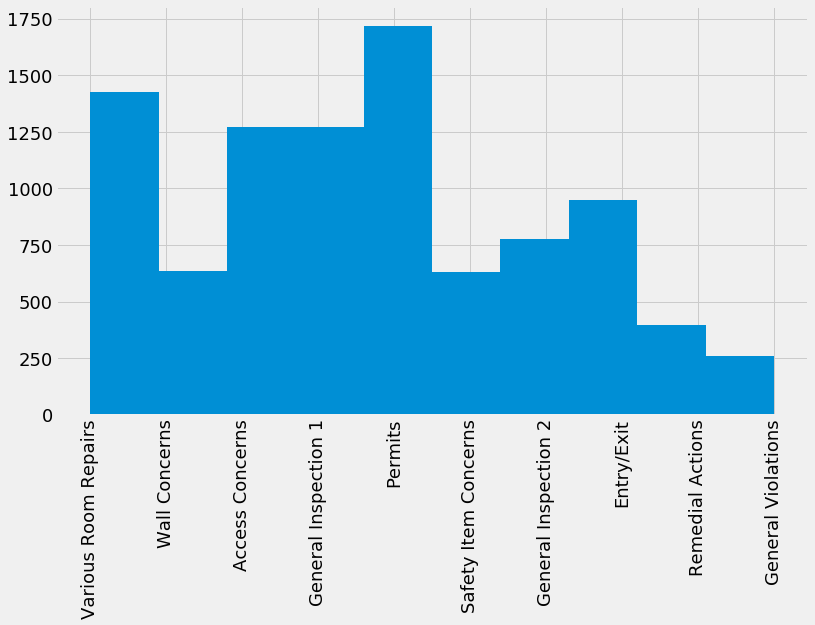

In [29]:
# top topic frequency plot
plt.hist(np.vectorize(top_dic.get)(top_vec), bins=10)
plt.xticks(rotation=90);

### Topics by location

In [26]:
# function to create document x topic weight dataframe
def top_wgts(doc_tops, names, idx):
    top_df = pd.DataFrame(doc_tops)
    top_df.columns = top_df.columns.map(names)
    top_df.set_index(idx, inplace=True)
    return(top_df)

In [30]:
top_wgts(nmf.transform(vect_df), top_dic, df_comments.index)

,General Inspection 1,Various Room Repairs,General Inspection 2,Entry/Exit,Permits,Safety Item Concerns,Access Concerns,General Violations,Remedial Actions,Wall Concerns
Complaint Number,,,,,,,,,,
H9603159,0.005023,0.011038,0.000000,0.008908,0.002760,0.001807,0.000567,0.003571,0.000455,0.002884
201970641,0.000000,0.031675,0.000000,0.004115,0.020416,0.000000,0.018401,0.000000,0.000000,0.104676
201970591,0.000000,0.000000,0.014127,0.000000,0.010273,0.000858,0.165048,0.000000,0.000000,0.001422
201969631,0.000000,0.000000,0.000000,0.000000,0.056053,0.000000,0.000000,0.000000,0.000000,0.093231
201968181,0.168835,0.000299,0.001994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000560
201967781,0.006546,0.000000,0.000000,0.000000,0.177717,0.000000,0.000000,0.000000,0.000000,0.000000
201967471,0.000000,0.013792,0.000000,0.000000,0.000000,0.109273,0.000000,0.000000,0.039087,0.000000
201966981,0.184053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
201966791,0.004337,0.000000,0.000000,0.005941,0.030073,0.024505,0.002463,0.000000,0.013758,0.000168


In [31]:
# document x topic weight dataframe 
df_topics = pd.DataFrame(nmf.transform(vect_df))
# map topic name to integers
df_topics.columns = df_topics.columns.map(top_dic)
# reset index to complaint number
df_topics.set_index(df_comments.index, inplace=True)
df_topics.head()

,General Inspection 1,Various Room Repairs,General Inspection 2,Entry/Exit,Permits,Safety Item Concerns,Access Concerns,General Violations,Remedial Actions,Wall Concerns
Complaint Number,,,,,,,,,,
H9603159,0.005023,0.011038,0.000000,0.008908,0.002760,0.001807,0.000567,0.003571,0.000455,0.002884
201970641,0.000000,0.031675,0.000000,0.004115,0.020416,0.000000,0.018401,0.000000,0.000000,0.104676
201970591,0.000000,0.000000,0.014127,0.000000,0.010273,0.000858,0.165048,0.000000,0.000000,0.001422
201969631,0.000000,0.000000,0.000000,0.000000,0.056053,0.000000,0.000000,0.000000,0.000000,0.093231
201968181,0.168835,0.000299,0.001994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000560


In [29]:
# convert to topic percentages
df_topics_perc = df_topics.div(df_topics.sum(axis=1), axis=0)
df_topics_perc.dropna(inplace=True)

In [33]:
# join topic df and zipcodes
df_zips = pd.Series(df['Zipcode']).to_frame()
top_loc = pd.merge(df_topics_perc, df_zips, left_index=True, right_index=True)
top_loc.head()

,General Inspection 1,Various Room Repairs,General Inspection 2,Entry/Exit,Permits,General Violations 1,General Violations 2,Remidial Instruction,Wall Concerns,Access Concerns,Zipcode
Complaint Number,,,,,,,,,,,
H9603159,0.135707,0.298222,0.000000,0.240669,0.074558,0.048830,0.015317,0.096487,0.012302,0.077909,94124.0
201970641,0.000000,0.176674,0.000000,0.022952,0.113877,0.000000,0.102637,0.000000,0.000000,0.583860,94118.0
201970591,0.000000,0.000000,0.073684,0.000000,0.053578,0.004476,0.860843,0.000000,0.000000,0.007419,94118.0
201969631,0.000000,0.000000,0.000000,0.000000,0.375477,0.000000,0.000000,0.000000,0.000000,0.624523,94117.0
201968181,0.983383,0.001741,0.011612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003264,94124.0


In [34]:
# group and average topic percentages by zipcode
top_loc.groupby('Zipcode').mean()

,General Inspection 1,Various Room Repairs,General Inspection 2,Entry/Exit,Permits,General Violations 1,General Violations 2,Remidial Instruction,Wall Concerns,Access Concerns
Zipcode,,,,,,,,,,
94102.0,0.130304,0.203285,0.082155,0.104702,0.148923,0.075421,0.110198,0.021281,0.051870,0.071862
94103.0,0.123307,0.179165,0.064574,0.118126,0.160708,0.085621,0.117360,0.047319,0.046091,0.057729
94104.0,0.000000,0.101435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.898565
94105.0,0.557708,0.077208,0.015763,0.035337,0.134159,0.080748,0.008582,0.070820,0.005274,0.014400
94107.0,0.124115,0.148933,0.050137,0.101043,0.177608,0.090402,0.138688,0.047697,0.051545,0.069832
94108.0,0.126691,0.158148,0.064128,0.098422,0.170460,0.060878,0.146088,0.039215,0.062904,0.073064
94109.0,0.122326,0.165109,0.097108,0.109223,0.152059,0.068279,0.125696,0.029684,0.055910,0.074607
94110.0,0.124419,0.168278,0.091308,0.081691,0.143582,0.089450,0.130067,0.036826,0.059710,0.074669
94111.0,0.158947,0.140915,0.031370,0.166924,0.131442,0.100743,0.097706,0.044808,0.072858,0.054287
